# Sarcasm Detection

A sarcasm detection project aims to develop a system or model capable of identifying sarcasm in text or speech. Sarcasm is a form of communication where the intended meaning is often the opposite of the literal words used.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [4]:
dataframe = pd.read_json('Sarcasm_Headlines_Dataset.json', lines = True)

In [5]:
dataframe.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
dataframe.tail()

,article_link,headline,is_sarcastic
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0
26708,https://www.huffingtonpost.com/entry/gourmet-g...,gourmet gifts for the foodie 2014,0


In [7]:
dataframe.shape

(26709, 3)

In [9]:
dataframe['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

This dataset has three columns, out of which we only need the “headline” column as a feature and the “is_sarcastic” column as a label. So let’s select these columns.

In [11]:
dataframe = dataframe[['headline', 'is_sarcastic']]

In [12]:
x = np.array(dataframe['headline'])
y = np.array(dataframe['is_sarcastic'])

In [13]:
x.shape, y.shape

((26709,), (26709,))

# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21367,), (5342,), (21367,), (5342,))

# BernoulliNB

The BernoulliNB class is part of the scikit-learn library, a popular machine learning library in Python. It implements the Bernoulli Naive Bayes algorithm for classification. Naive Bayes classifiers are based on Bayes' theorem, which uses probability theory to make predictions based on input features.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

In [22]:
cv = CountVectorizer()

In [23]:
x = cv.fit_transform(x)

In [24]:
x

<26709x25292 sparse matrix of type '<class 'numpy.int64'>'
	with 257757 stored elements in Compressed Sparse Row format>

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21367, 25292), (5342, 25292), (21367,), (5342,))

In [29]:
model = BernoulliNB()

In [30]:
model.fit(x_train, y_train)

BernoulliNB()

In [31]:
print(model.score(x_test, y_test))

0.8448146761512542


# Predicting On x-Test

In [46]:
y_pred = model.predict(x_test)

In [47]:
y_pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [48]:
print(y_test[10]), print(y_pred[10])

0
0


(None, None)

# Error Analysis

Error analysis is an important step in evaluating and improving the performance of a machine learning model. It involves analyzing the errors made by the model during prediction or classification tasks and gaining insights into the types of mistakes it is making. Error analysis can provide valuable information for model refinement and identifying areas for improvement

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Accuracy score is a commonly used metric to evaluate the performance of a classification model. It measures the proportion of correct predictions made by the model out of the total number of predictions.

The accuracy score is calculated using the following formula:

Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)



In [50]:
accuracy_score = accuracy_score(y_test, y_pred)

In [51]:
accuracy_score

0.8448146761512542

A classification report is a summary of various evaluation metrics for a classification model. It provides a comprehensive overview of the model's performance, including metrics such as precision, recall, F1 score, and support.

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2996
           1       0.86      0.77      0.81      2346

    accuracy                           0.84      5342
   macro avg       0.85      0.84      0.84      5342
weighted avg       0.85      0.84      0.84      5342



A confusion matrix is a table that summarizes the performance of a classification model by showing the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. It is a useful tool for evaluating the accuracy and effectiveness of a classification model.

In [53]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [54]:
confusion_matrix

array([[2700,  296],
       [ 533, 1813]], dtype=int64)

<AxesSubplot:>

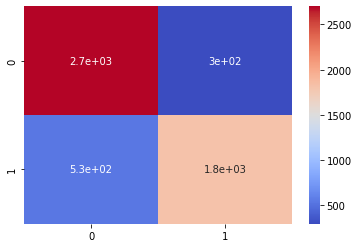

In [55]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix, 
            annot = True, 
            cmap = 'coolwarm')

# Thanks !